# **`Notebook Information`**
- **Name:** Mhar Andrei Consebido Macapallag
- **Y&S:** BSCS 3B IS
- **Course:** CSST 101 | Advanced Representation and Reasoning
- **Topic:** Topic 2.1 Introduction to Probability in AI
- **Due date:** N/A

# **`Machine Problem #3: Interactive Probability and Decision-Making in AI`**

In [10]:
#@title # **`Part 1: Implement Basic Probability Calculations`**

def joint_probability(p_A, p_B):
    """
    Compute the joint probability of two independent events A and B.

    Parameters:
    - p_A (float): Probability of event A.
    - p_B (float): Probability of event B.

    Returns:
    - float: Joint probability P(A and B).
    """
    if not (0 <= p_A <= 1 and 0 <= p_B <= 1):
        return "Invalid input: Probabilities must be between 0 and 1."
    return p_A * p_B

def marginal_probability(p_A, p_B):
    """
    Compute the marginal probability of A or B, assuming independence.

    Parameters:
    - p_A (float): Probability of event A.
    - p_B (float): Probability of event B.

    Returns:
    - float: Marginal probability P(A or B).
    """
    jp = joint_probability(p_A, p_B)
    if isinstance(jp, str):  # If joint probability returned an error
        return jp
    return p_A + p_B - jp

def conditional_probability(p_A_and_B, p_A):
    """
    Compute the conditional probability P(B|A) using Bayes' Theorem.

    Parameters:
    - p_A_and_B (float): Joint probability P(A and B).
    - p_A (float): Probability of event A.

    Returns:
    - float: Conditional probability P(B|A).
    """
    if p_A == 0:
        return "Conditional probability is undefined (P(A) cannot be zero)."
    return p_A_and_B / p_A

#@markdown ## **Enter the probabilities for the events (`between 0 and 1`):**
Probability_of_Event_A = 0.6 #@param {type:"number"}
Probability_of_Event_B = 0.3 #@param {type:"number"}

# Interactive Component: Get user input and calculate probabilities
def interactive_probability_calculations():
    """
    Interactively calculate joint, marginal, and conditional probabilities based on user input.
    """

    try:
        p_A = float(Probability_of_Event_A)
        p_B = float(Probability_of_Event_B)
    except ValueError:
        print("Invalid input. Please enter numerical values.")
        return

    jp = joint_probability(p_A, p_B)
    mp = marginal_probability(p_A, p_B)
    # Calculate conditional probability if the joint probability and p_A are valid
    if isinstance(jp, float) and p_A > 0:
        cp = conditional_probability(jp, p_A)
    else:
        cp = "Cannot compute conditional probability due to invalid inputs."

    print(f"Joint Probability P(A and B): {jp}")
    print(f"Marginal Probability P(A or B): {mp}")
    print(f"Conditional Probability P(B|A): {cp}")

# Call the interactive function
interactive_probability_calculations()


Joint Probability P(A and B): 0.18
Marginal Probability P(A or B): 0.72
Conditional Probability P(B|A): 0.3


In [11]:
#@title # **`Part 2: Bayesian Inference for Real-World Scenarios`**

def bayesian_inference(prior_disease, likelihood_positive_given_disease, p_positive_test):
    """
    Perform Bayesian inference to update the probability of having a disease given a positive test result.

    Parameters:
    - prior_disease (float): Prior probability of having the disease (P(Disease)).
    - likelihood_positive_given_disease (float): Likelihood of a positive test given the disease (P(Positive Test | Disease)).
    - p_positive_test (float): Total probability of a positive test (P(Positive Test)).

    Returns:
    - float: Posterior probability of having the disease given a positive test result (P(Disease | Positive Test)).
    """
    # Compute the posterior probability P(Disease | Positive Test) using Bayes' Theorem
    posterior_disease_given_positive = (likelihood_positive_given_disease * prior_disease) / p_positive_test

    return posterior_disease_given_positive

# Interactive Component
#@markdown ## **Enter the probabilities for the Bayesian inference (`between 0 and 1`):**
prior_disease = 0.01 #@param {type:"number"} # Prior probability of having the disease
likelihood_positive_given_disease = 0.90 #@param {type:"number"} # Likelihood of a positive test given the disease
p_positive_test = 0.05 #@param {type:"number"} # Total probability of a positive test

# Interactive Function
def interactive_bayesian_inference():
    """
    Interactively calculate the posterior probability of having a disease based on a positive test result.
    """

    try:
        prior = float(prior_disease)
        likelihood = float(likelihood_positive_given_disease)
        p_positive = float(p_positive_test)
    except ValueError:
        print("Invalid input. Please enter numerical values.")
        return

    # Calculate the posterior probability
    posterior = bayesian_inference(prior, likelihood, p_positive)

    print(f"Posterior Probability of having the disease given a positive test result: {posterior:.4f}")

# Call the interactive function
interactive_bayesian_inference()


Posterior Probability of having the disease given a positive test result: 0.1800


Average return after 1000 trials: $533.50


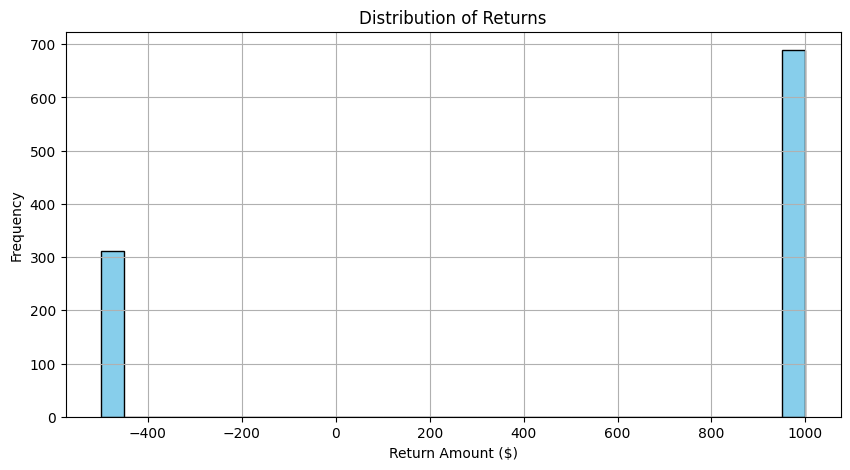

In [12]:
#@title # **`Part 3: Simulate Decision-Making Under Uncertainty`**

import numpy as np
import matplotlib.pyplot as plt

def simulate_decision(num_trials, p_success, reward_success, penalty_failure):
    """
    Simulates a decision-making process with uncertain outcomes and calculates the average return.

    Parameters:
    - num_trials (int): Number of trials to run.
    - p_success (float): Probability of a successful outcome (between 0 and 1).
    - reward_success (float): Reward amount for a successful outcome.
    - penalty_failure (float): Penalty amount for a failed outcome.

    Returns:
    - float: Average return after all trials.
    - list: List of returns for each trial.
    """
    # Initialize variables
    returns = []

    # Run the simulation for the specified number of trials
    for _ in range(num_trials):
        if np.random.rand() < p_success:
            # Success
            returns.append(reward_success)
        else:
            # Failure
            returns.append(penalty_failure)

    # Calculate the average return
    average_return = np.mean(returns)
    return average_return, returns

# Interactive Component
#@markdown ## **Enter the parameters for the simulation (`between 0 and 1` for probability):**
num_trials = 1000 #@param {type:"number"} # Number of trials
p_success = 0.7 #@param {type:"number"} # Probability of success
reward_success = 1000 #@param {type:"number"} # Reward amount for success
penalty_failure = -500 #@param {type:"number"} # Penalty amount for failure

# Run the simulation
average_return, returns = simulate_decision(num_trials, p_success, reward_success, penalty_failure)

# Display the result
print(f"Average return after {num_trials} trials: ${average_return:.2f}")

# Plot the returns to visualize the distribution
plt.figure(figsize=(10, 5))
plt.hist(returns, bins=30, edgecolor='black', color='skyblue')
plt.title('Distribution of Returns')
plt.xlabel('Return Amount ($)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


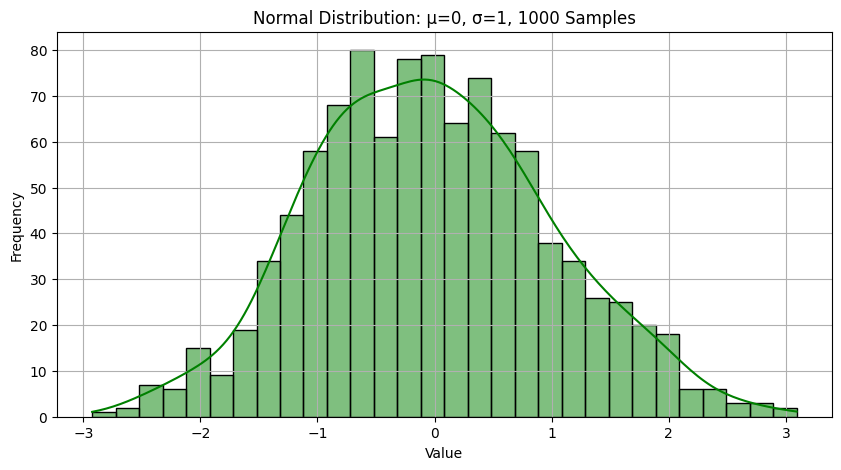

In [13]:
#@title # **`Part 4: Visualize Probability Distributions`**

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def simulate_binomial(n_trials, p_head, n_simulations):
    """
    Simulates a binomial distribution of coin flips and returns the outcomes.

    Parameters:
    - n_trials (int): Number of coin flips per simulation.
    - p_head (float): Probability of flipping heads (range: 0 to 1).
    - n_simulations (int): Number of simulations (e.g., 1000 coin flips).

    Returns:
    - array: Outcomes of the binomial simulation (number of heads per simulation).
    """
    return np.random.binomial(n=n_trials, p=p_head, size=n_simulations)

def simulate_normal(mu, sigma, size):
    """
    Simulates a normal distribution with specified mean and standard deviation.

    Parameters:
    - mu (float): Mean of the distribution.
    - sigma (float): Standard deviation of the distribution.
    - size (int): Number of samples to generate.

    Returns:
    - array: Outcomes of the normal distribution.
    """
    return np.random.normal(mu, sigma, size)

# Interactive Component
#@markdown ## **Choose a distribution to simulate and visualize:**
distribution_choice = "Normal" #@param ["Binomial", "Normal"]

if distribution_choice == "Binomial":
    #@markdown - `User inputs for binomial distribution`
    num_trials = 10 #@param {type:"number"} # Number of trials (coin flips)
    p_head = 0.5 #@param {type:"number"}  # Probability of getting heads
    num_simulations = 1000 #@param {type:"number"} # Number of simulations

    # Simulate binomial distribution
    binomial_outcomes = simulate_binomial(num_trials, p_head, num_simulations)

    # Visualize the binomial distribution
    plt.figure(figsize=(10, 5))
    sns.histplot(binomial_outcomes, bins=num_trials + 1, kde=False, color='blue', edgecolor='black')
    plt.title(f'Binomial Distribution: {num_trials} Trials, {num_simulations} Simulations, p={p_head}')
    plt.xlabel('Number of Heads')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

elif distribution_choice == "Normal":
    #@markdown -  `User inputs for normal distribution`
    mu = 0  #@param {type:"number"} # Mean of the distribution
    sigma = 1  #@param {type:"number"} # Standard deviation
    size = 1000  #@param {type:"number"} # Number of samples

    # Simulate normal distribution
    normal_outcomes = simulate_normal(mu, sigma, size)

    # Visualize the normal distribution
    plt.figure(figsize=(10, 5))
    sns.histplot(normal_outcomes, bins=30, kde=True, color='green', edgecolor='black')
    plt.title(f'Normal Distribution: μ={mu}, σ={sigma}, {size} Samples')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

else:
    print("Invalid choice. Please select either 'Binomial' or 'Normal'.")


In [14]:
#@title # **`Part 5: Real-World Scenario Prediction`**

def predict_rain(humidity, cloud_cover, p_rain_given_high_humidity=0.8, p_rain_given_high_cloud_cover=0.7):
    """
    Predicts the probability of rain based on humidity and cloud cover.

    Parameters:
    - humidity (float): Humidity level (0 to 1).
    - cloud_cover (float): Cloud cover level (0 to 1).
    - p_rain_given_high_humidity (float): Probability of rain given high humidity.
    - p_rain_given_high_cloud_cover (float): Probability of rain given high cloud cover.

    Returns:
    - float: Probability of rain.
    """
    # Assume probabilities are higher with high values of humidity and cloud cover
    if not (0 <= humidity <= 1 and 0 <= cloud_cover <= 1):
        return "Invalid input: Humidity and cloud cover must be between 0 and 1."

    # Calculate the probability of rain based on weighted average of conditions
    p_rain = (p_rain_given_high_humidity * humidity + p_rain_given_high_cloud_cover * cloud_cover) / 2

    return p_rain

# Interactive Component
#@markdown ## **Enter the values for humidity and cloud cover (between 0 and 1):**
humidity = 0.5 #@param {type:"number"} # Humidity level
cloud_cover = 0.6 #@param {type:"number"} # Cloud cover level

# Calculate the probability of rain based on user inputs
probability_of_rain = predict_rain(humidity, cloud_cover)

# Display the result
if isinstance(probability_of_rain, str):
    print(probability_of_rain)
else:
    print(f"Given a humidity of {humidity*100}% and cloud cover of {cloud_cover*100}%,")
    print(f"the predicted probability of rain is {probability_of_rain:.2f}.")

    # Feedback on likelihood
    if probability_of_rain > 0.7:
        print("It's likely to rain.")
    elif probability_of_rain > 0.4:
        print("There's a moderate chance of rain.")
    else:
        print("It's unlikely to rain.")


Given a humidity of 50.0% and cloud cover of 60.0%,
the predicted probability of rain is 0.41.
There's a moderate chance of rain.
